In [106]:
using MDToolbox, PyPlot, Statistics, LinearAlgebra
PyPlot.plt.style.use("seaborn-colorblind")
ENV["COLUMNS"] = 110; #display width for MDToolbox

In [107]:
pdb_xtal = mdload("/data/yasu/vhh_grest/grest_6dba_swissmodel_dihedral/ground_truth.pdb");

pdb_init = mdload("/data/yasu/vhh_grest/grest_6dba_swissmodel_dihedral/prot.pdb");
ta1 = mdload("/data/yasu/vhh_grest/grest_6dba_swissmodel_dihedral/07_remd_convert/run_param1_stride10.nc");
ta = [pdb_init; ta1]

50001x1858 TrjArray{Float64, Int64}
|                            |                            |  …                              |
| 1GLN                       | 1GLN                       |  …   123SER                     |
| 1N                         | 2HT1                       |  …   1858HT3                    |
|    16.66   -10.33    -8.34 |    17.33   -10.24    -7.54 |  …     -24.42    -4.48     4.24 |
|    17.98     3.58    -1.72 |    18.79     4.11    -1.34 |        -13.49   -12.55    19.69 |
|    18.44     4.05    -1.39 |    19.09     4.66    -0.86 |        -14.05   -12.91    19.86 |
|    18.80     4.02    -1.45 |    19.57     4.24    -0.79 |        -14.19   -11.98    20.68 |
|    18.53     3.77    -1.22 |    19.31     4.37    -0.89 |        -14.05   -12.01    20.52 |
|    33.95   -18.90   -18.00 |    34.44   -18.87   -17.09 |  …      -6.16   -15.74   -29.03 |
|    33.31   -19.27   -17.70 |    33.64   -19.39   -16.72 |         -7.85   -15.25   -31.13 |
|    33.46   -19.18   -1

In [108]:
pdb_xtal

1x1856 TrjArray{Float64, Int64}
| A                          | A                          |  …   A                          |
| 1GLN                       | 1GLN                       |  …   123SER                     |
| 1N                         | 2CA                        |  …   1912HG                     |
|     9.72    -4.55    -9.62 |    11.18    -4.31    -9.79 |  …      15.90   -13.49    28.84 |

In [109]:
pdb_init

1x1858 TrjArray{Float64, Int64}
|                            |                            |  …                              |
| 1GLN                       | 1GLN                       |  …   123SER                     |
| 1N                         | 2HT1                       |  …   1858HT3                    |
|    16.66   -10.33    -8.34 |    17.33   -10.24    -7.54 |  …     -24.42    -4.48     4.24 |

In [110]:
pdb_xtal = pdb_xtal["(atomname CA) and (resid 99:112)"]
pdb_init = pdb_init["(atomname CA) and (resid 99:112)"]
ta = ta["(atomname CA) and (resid 99:112)"];

In [111]:
x_xtal = MDToolbox.compute_distancemap(pdb_xtal);
x_init = MDToolbox.compute_distancemap(pdb_init);

In [112]:
X = MDToolbox.compute_distancemap(ta);

In [113]:
X_mean = mean(X, dims=1)

1×66 Matrix{Float64}:
 6.36897  9.90367  10.9353  10.258  12.6693  12.7124  …  12.6313  14.9488  9.67609  12.4265  9.37283

In [114]:
X .= X .- X_mean
e = eigen(X' * X ./ size(X, 1))
lambda = e.values[end:-1:1]
W = e.vectors[:, end:-1:1]
P = X * W

50001×66 Matrix{Float64}:
   1.76302   -7.80545    6.14285    -0.618609    -1.06104     …   0.0368596     0.0472105    -0.0185519
   1.67496    0.896788  -1.60421     0.633309    -1.03486         0.00160821    0.00166212   -0.00325085
   3.40583    0.763205  -0.684468   -0.157277    -0.0479457       0.0120476     0.00367385   -0.00169977
   3.19206    1.07314   -3.73368     0.00639898   0.0467333       0.0108088     0.0102804    -0.0130586
   3.25669   -1.54272   -2.86037    -1.72197     -0.957494       -0.00445003   -0.00858791   -0.0136683
   7.69612    1.57227    8.46786    -1.0311       0.359437    …  -0.0230271    -0.0093725     0.0406931
   4.11338    0.904978   5.23738    -1.77419     -1.24091         0.0165064    -0.0134227    -0.0115932
   6.78912   -0.423703   7.90298    -1.89615     -0.65623         0.00659131   -0.0181388     0.00242605
   6.27805    1.89517    7.4988     -1.3974      -0.224345        0.0249373    -0.0274244     0.00759117
 -21.4451    -1.68084    0.0246793

In [115]:
p_xtal = (x_xtal .- X_mean) * W
p_init = (x_init .- X_mean) * W

1×66 Matrix{Float64}:
 1.76302  -7.80545  6.14285  -0.618609  -1.06104  1.32442  …  0.0379795  0.0368596  0.0472105  -0.0185519

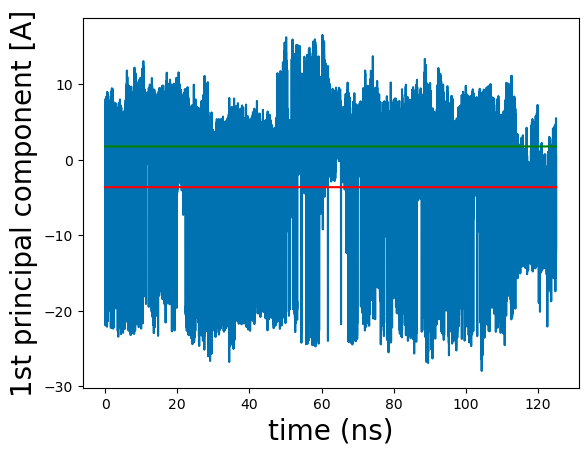

In [116]:
plot((1:size(P, 1)).*0.25*0.0001*100, P[:, 1])
plot((1:size(P, 1)).*0.25*0.0001*100, ones(size(P,1))*p_xtal[1], color=:red)
plot((1:size(P, 1)).*0.25*0.0001*100, ones(size(P,1))*p_init[1], color=:green)
ylabel("1st principal component [A]",fontsize=20);
xlabel("time (ns)",fontsize=20);
savefig("timeseries_grest.png", dpi=350, bbox_inches="tight");

In [117]:
P

50001×66 Matrix{Float64}:
   1.76302   -7.80545    6.14285    -0.618609    -1.06104     …   0.0368596     0.0472105    -0.0185519
   1.67496    0.896788  -1.60421     0.633309    -1.03486         0.00160821    0.00166212   -0.00325085
   3.40583    0.763205  -0.684468   -0.157277    -0.0479457       0.0120476     0.00367385   -0.00169977
   3.19206    1.07314   -3.73368     0.00639898   0.0467333       0.0108088     0.0102804    -0.0130586
   3.25669   -1.54272   -2.86037    -1.72197     -0.957494       -0.00445003   -0.00858791   -0.0136683
   7.69612    1.57227    8.46786    -1.0311       0.359437    …  -0.0230271    -0.0093725     0.0406931
   4.11338    0.904978   5.23738    -1.77419     -1.24091         0.0165064    -0.0134227    -0.0115932
   6.78912   -0.423703   7.90298    -1.89615     -0.65623         0.00659131   -0.0181388     0.00242605
   6.27805    1.89517    7.4988     -1.3974      -0.224345        0.0249373    -0.0274244     0.00759117
 -21.4451    -1.68084    0.0246793

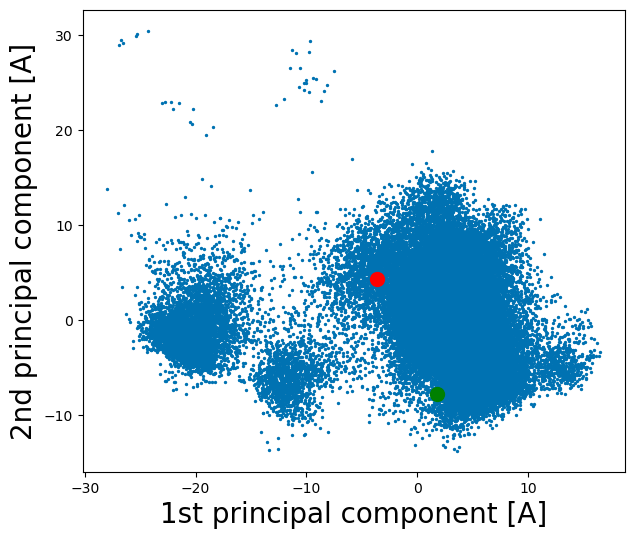

In [118]:
fig, ax = subplots(figsize=(7, 6));
ax.scatter(P[:, 1], P[:, 2], s=2.0);
ax.scatter(p_xtal[1], p_xtal[2], s=100.0, color=:red);
ax.scatter(p_init[1, 1], p_init[1, 2], s=100.0, color=:green);
xlabel("1st principal component [A]",fontsize=20);
ylabel("2nd principal component [A]",fontsize=20);

# detailed options (not necessary, just for reference)
#ax.set(xlim=[-20, 10], ylim=[-10, 15]);
#ax.xaxis.set_tick_params(which="major",labelsize=15);
#ax.yaxis.set_tick_params(which="major",labelsize=15);
#ax.grid(linestyle="--", linewidth=0.5);
#tight_layout();

savefig("scatter_grest.png", dpi=350);

In [119]:
#index = P[:, 1] .< -20

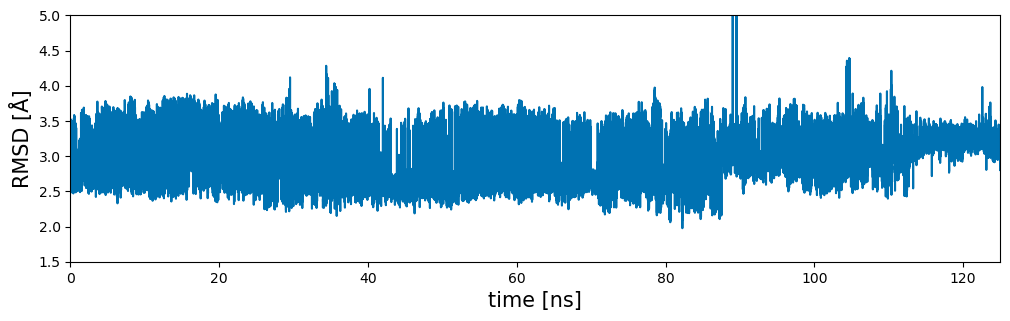

(1.5, 5.0)

In [121]:
ta_fitted = superimpose(pdb_xtal, ta);
rmsd = compute_rmsd(pdb_xtal, ta_fitted[:, :])

fig, ax = subplots(figsize=(12, 3.2));
plot((1:size(P[:, :], 1)).*0.25*0.0001*100, rmsd)
ylabel("RMSD [Å]",fontsize=15);
xlabel("time [ns]",fontsize=15);
savefig("rmsd.png", dpi=350, bbox_inches="tight");
xlim([0, 125])
ylim([1.5, 5.0])